<a href="https://colab.research.google.com/github/Art9521/Art9521/blob/main/IBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Введение**

Для выполнения данной творческой задачи я выбрал датасет IMDb. Цель проекта - спрогнозировать популярность фильмов на основе различных характеристик, таких как жанр, продолжительность, актерский состав, рейтинг и другие. Проект включает в себя все этапы классического машинного обучения: сбор данных, предварительную обработку, анализ данных, визуализацию, построение моделей и оценку их качества. Результаты проекта можно будет включить в резюме и разместить на GitHub.

**1: Сбор данных**

Используемый датасет будет взят с официального сайта IMDb: IMDb Dataset. Этот датасет содержит информацию о фильмах, включая их метаданные, рейтинги и отзывы зрителей.

**2: Предварительная обработка данных**

На этом этапе необходимо выполнить следующие действия:

1.   Загрузка данных.
2.   Очистка данных от пропусков и дубликатов.
3.   Преобразование категориальных признаков в числовые.
4.    Нормализация числовых признаков.

**3: Анализ данных и визуализация**
Для анализа данных будут использованы следующие визуализации:

1.  Гистограммы и боксплоты для визуализации распределения числовых признаков.
2.  Тепловая карта корреляций для выявления взаимосвязей между признаками.
3.  Графики рассеяния для анализа зависимости целевой переменной от различных признаков.

**4: Построение моделей**
Будут использованы следующие модели машинного обучения:

1.  Линейная регрессия.
2.  Случайный лес.
3.  Градиентный бустинг.
4.  K-ближайших соседей.

Для каждой модели будет проведена настройка гиперпараметров с использованием кросс-валидации.

**5: Оценка качества моделей**
Оценка моделей будет проведена с использованием следующих метрик:

1.  Среднеквадратичная ошибка (MSE).
2.  Коэффициент детерминации (R^2).
3.  Средняя абсолютная ошибка (MAE).

**6: Итоговый отчет и визуализация результатов**
В отчет будут включены:

1. Описание датасета и целевой переменной.
2. Предварительная обработка данных.
3. Визуализация данных.
4. Описание и сравнение моделей.
5. Выводы и рекомендации.

Для начала работы над проектом необходимо загрузить и подготовить данные. Далее приведен код для выполнения первых шагов проек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**2: Предварительная обработка данных**

На этом этапе необходимо выполнить следующие действия:

1.   Загрузка данных.
2.   Очистка данных от пропусков и дубликатов.
3.   Преобразование категориальных признаков в числовые.
4.    Нормализация числовых признаков.

In [25]:
# Загрузка данных
url = "https://datasets.imdbws.com/title.basics.tsv.gz"
df = pd.read_csv(url, delimiter='\t', low_memory=False)

# Очистка данных
df = df.dropna(subset=['primaryTitle', 'startYear', 'runtimeMinutes', 'genres'])
df = df[df['titleType'] == 'movie']

# Преобразование данных в числовой формат
df['startYear'] = pd.to_numeric(df['startYear'], errors='coerce')
df['runtimeMinutes'] = pd.to_numeric(df['runtimeMinutes'], errors='coerce')

# Удаление строк с пропусками в столбце runtimeMinutes
df_cleaned = df.dropna(subset=['runtimeMinutes'])

# Фильтрация длительности фильмов в пределах от 40 до 300 минут
df_filtered = df_cleaned[(df_cleaned['runtimeMinutes'] >= 40) & (df_cleaned['runtimeMinutes'] <= 300)]

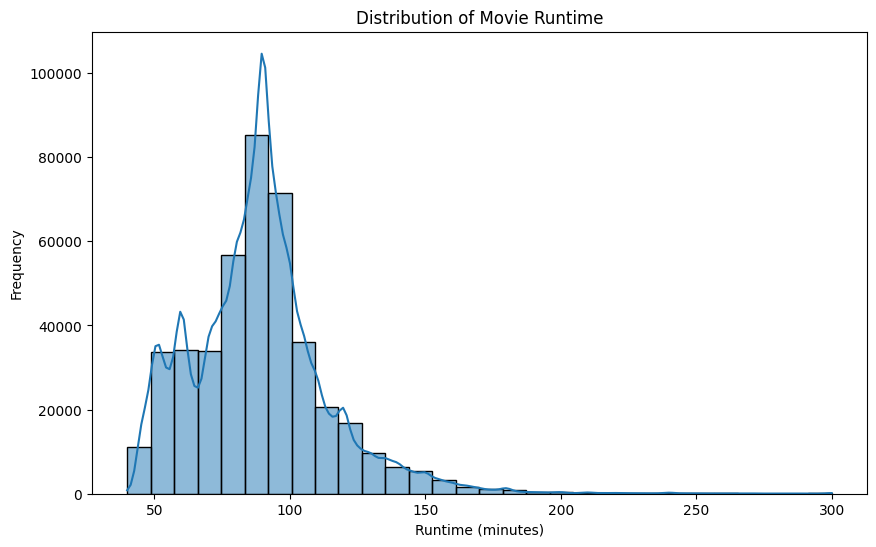

In [26]:
# Визуализация распределения длительности фильмов
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['runtimeMinutes'], bins=30, kde=True)
plt.title('Distribution of Movie Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.show()

**Шаг 3: Анализ данных и визуализация**

Теперь мы перейдем к более подробному анализу данных и визуализации различных аспектов, чтобы лучше понять структуру данных и выявить важные взаимосвязи.

3.1. Визуализация распределения рейтингов и продолжительности фильмов
Для начала визуализируем распределение рейтингов и продолжительности фильмов, чтобы увидеть общие тенденции.

In [4]:
# Загрузка дополнительных данных о рейтингах фильмов
url_ratings = "https://datasets.imdbws.com/title.ratings.tsv.gz"
ratings_df = pd.read_csv(url_ratings, delimiter='\t')

# Объединение данных о фильмах и рейтингах
merged_df = pd.merge(df, ratings_df, on='tconst')


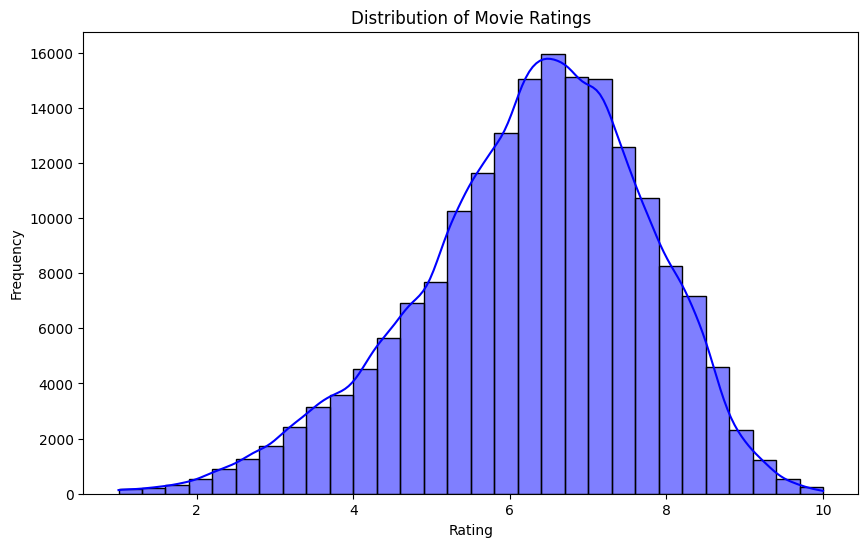

In [5]:
# Визуализация распределения рейтингов фильмов
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['averageRating'], bins=30, kde=True, color='blue')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

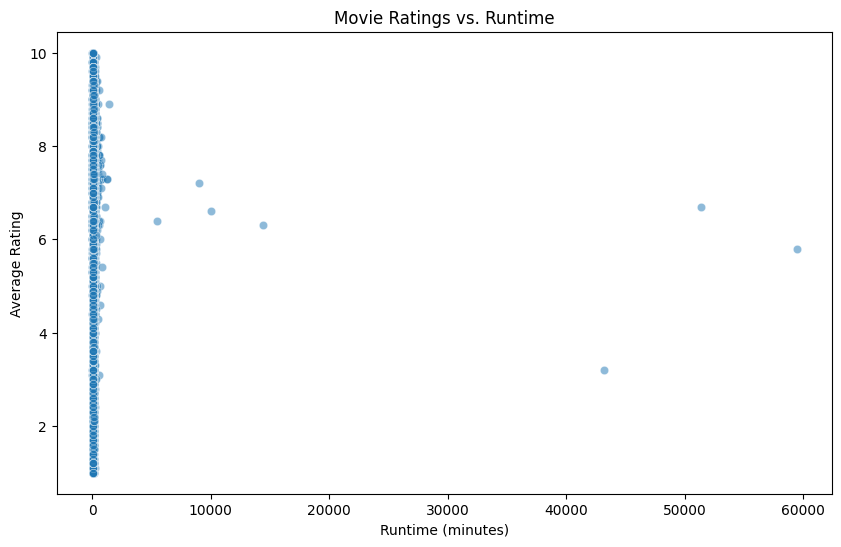

In [6]:
# Визуализация зависимости рейтинга от продолжительности фильма
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='runtimeMinutes', y='averageRating', alpha=0.5)
plt.title('Movie Ratings vs. Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Average Rating')
plt.show()

**3.2 Тепловая карта корреляций**

Создадим тепловую карту корреляций для числовых признаков, чтобы выявить возможные взаимосвязи между ними.

In [7]:
# Корреляционная матрица
correlation_matrix = merged_df[['startYear', 'runtimeMinutes', 'averageRating', 'numVotes']].corr()

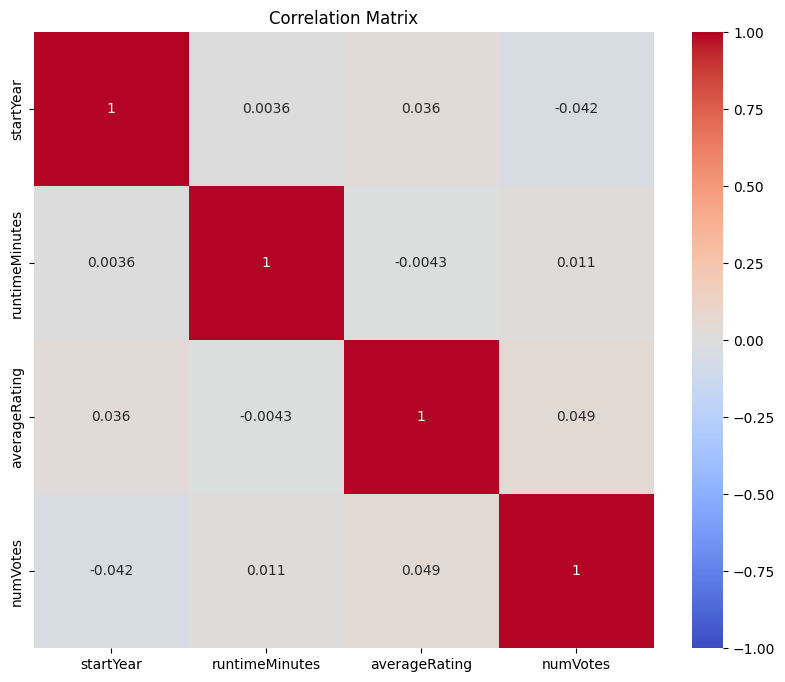

In [8]:
# Визуализация корреляционной матрицы
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

**3.3 Анализ жанров**

Проведем анализ жанров, чтобы понять их влияние на рейтинг и популярность фильмов.

In [9]:
# Подсчет количества фильмов в каждом жанре
genre_counts = genres.sum().sort_values(ascending=False)

<ipython-input-10-dc9db3a07048>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')


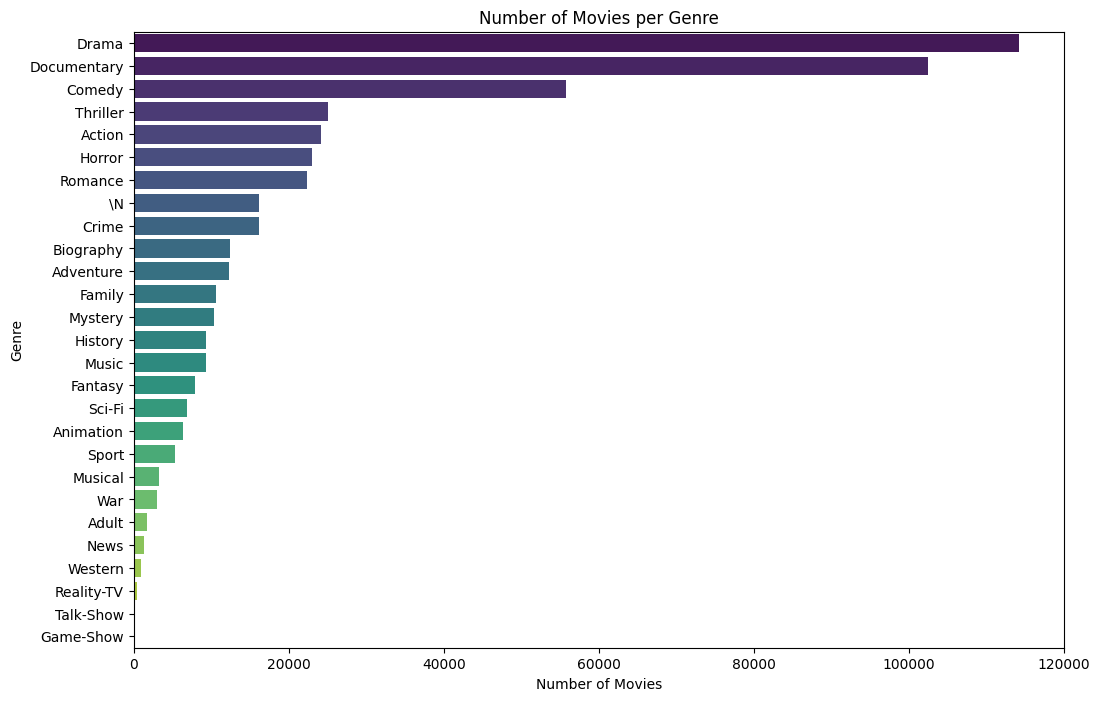

In [10]:
# Визуализация количества фильмов по жанрам
plt.figure(figsize=(12, 8))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title('Number of Movies per Genre')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

In [11]:
# Анализ рейтингов по жанрам
genre_ratings = pd.melt(merged_df, id_vars=['averageRating'], value_vars=genres.columns)
genre_ratings = genre_ratings[genre_ratings['value'] == 1]

<ipython-input-12-5a31180b9fd3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=genre_ratings, x='variable', y='averageRating', palette='viridis')


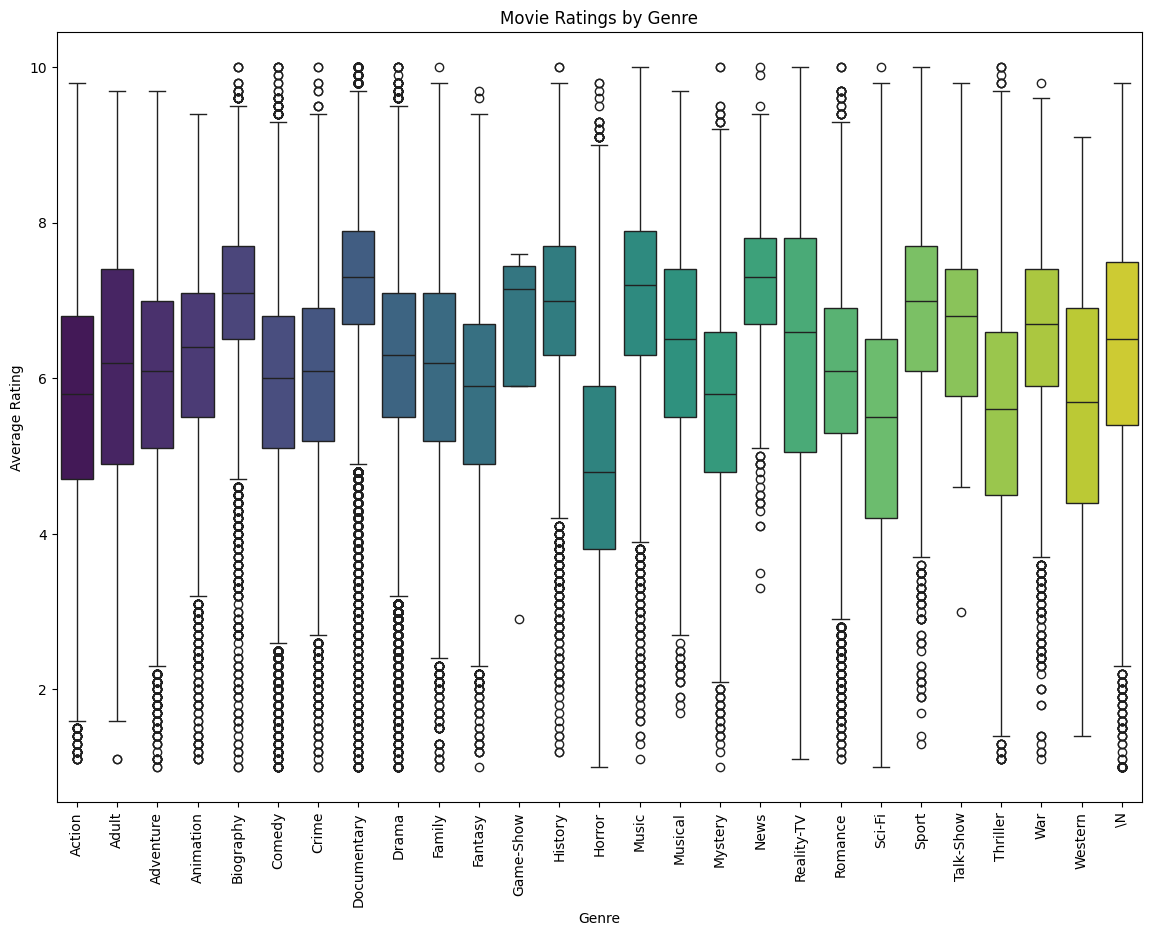

In [12]:
plt.figure(figsize=(14, 10))
sns.boxplot(data=genre_ratings, x='variable', y='averageRating', palette='viridis')
plt.title('Movie Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()

**3.4 Зависимость рейтинга от года выпуска**

Проанализируем, как изменялись рейтинги фильмов с течением времени.

**3.5 Взаимосвязь количества голосов и рейтинга**

Проанализируем, как количество голосов связано с рейтингом фильма.

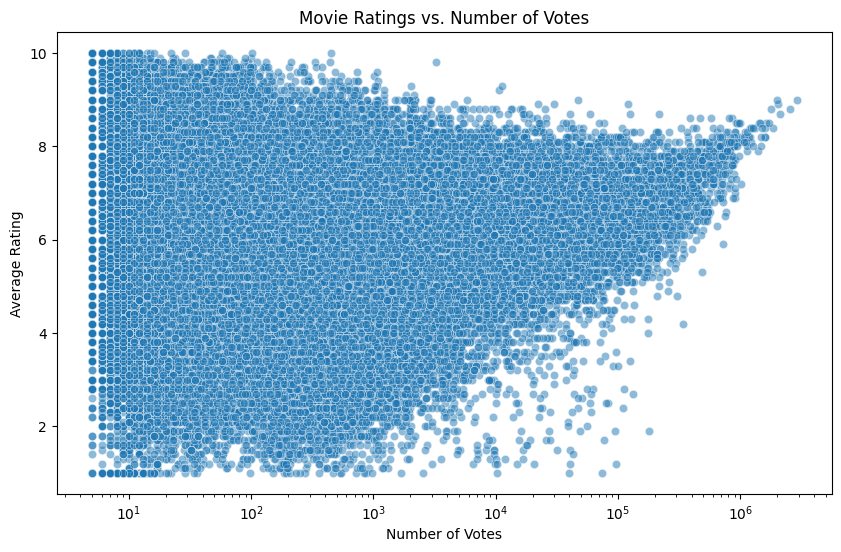

In [13]:
# Визуализация зависимости количества голосов от рейтинга
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='numVotes', y='averageRating', alpha=0.5)
plt.title('Movie Ratings vs. Number of Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Average Rating')
plt.xscale('log')
plt.show()

**Шаг 4: Построение моделей**

Теперь, когда мы проанализировали данные и выявили важные взаимосвязи, можем перейти к построению моделей машинного обучения для прогнозирования рейтингов фильмов.

Подготовка данных для моделирования

**Предварительная обработка данных**

Перед тем, как разделить данные на обучающую и тестовую выборки, необходимо обработать пропущенные значения. Один из способов — заменить пропуски на среднее значение соответствующего признака.

 **Определение признаков и целевой переменной**

In [15]:
# Выбор признаков для моделирования
features = merged_df[['startYear', 'runtimeMinutes', 'numVotes'] + list(genres.columns)]
target = merged_df['averageRating']

In [16]:
from sklearn.impute import SimpleImputer

# Импутация пропущенных значений средним
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

# Обновление DataFrame после импутации
features = pd.DataFrame(features_imputed, columns=features.columns)

Теперь продолжим с разделением данных на обучающую и тестовую выборки и нормализацией признаков.

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Нормализация числовых признаков
scaler = StandardScaler()
X_train[['startYear', 'runtimeMinutes', 'numVotes']] = scaler.fit_transform(X_train[['startYear', 'runtimeMinutes', 'numVotes']])
X_test[['startYear', 'runtimeMinutes', 'numVotes']] = scaler.transform(X_test[['startYear', 'runtimeMinutes', 'numVotes']])


Построение и оценка моделей

Для каждой модели будет проведена настройка гиперпараметров и оценка качества.

Линейная регрессия

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Построение модели линейной регрессии
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Предсказания и оценка модели
y_pred_train = lr_model.predict(X_train)
y_pred_test = lr_model.predict(X_test)

print("Linear Regression:")
print("Train MSE:", mean_squared_error(y_train, y_pred_train))
print("Test MSE:", mean_squared_error(y_test, y_pred_test))
print("Train R^2:", r2_score(y_train, y_pred_train))
print("Test R^2:", r2_score(y_test, y_pred_test))
print("Train MAE:", mean_absolute_error(y_train, y_pred_train))
print("Test MAE:", mean_absolute_error(y_test, y_pred_test))

Linear Regression:
Train MSE: 1.6754773512430907
Test MSE: 1.7523506975094831
Train R^2: 0.23420731210878565
Test R^2: 0.20046854041707773
Train MAE: 0.9991867544633692
Test MAE: 1.0034390134118156


Случайный лес

In [19]:
from sklearn.ensemble import RandomForestRegressor

# Построение модели случайного леса
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Предсказания и оценка модели
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

print("Random Forest:")
print("Train MSE:", mean_squared_error(y_train, y_pred_train))
print("Test MSE:", mean_squared_error(y_test, y_pred_test))
print("Train R^2:", r2_score(y_train, y_pred_train))
print("Test R^2:", r2_score(y_test, y_pred_test))
print("Train MAE:", mean_absolute_error(y_train, y_pred_train))
print("Test MAE:", mean_absolute_error(y_test, y_pred_test))

Random Forest:
Train MSE: 0.31870908318262964
Test MSE: 1.654247977408905
Train R^2: 0.854331014809188
Test R^2: 0.24522910752419103
Train MAE: 0.40224940797997955
Test MAE: 0.9814226359161377


Градиентный бустинг

In [20]:
from sklearn.ensemble import GradientBoostingRegressor

# Построение модели градиентного бустинга
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Предсказания и оценка модели
y_pred_train = gb_model.predict(X_train)
y_pred_test = gb_model.predict(X_test)

print("Gradient Boosting:")
print("Train MSE:", mean_squared_error(y_train, y_pred_train))
print("Test MSE:", mean_squared_error(y_test, y_pred_test))
print("Train R^2:", r2_score(y_train, y_pred_train))
print("Test R^2:", r2_score(y_test, y_pred_test))
print("Train MAE:", mean_absolute_error(y_train, y_pred_train))
print("Test MAE:", mean_absolute_error(y_test, y_pred_test))

Gradient Boosting:
Train MSE: 1.4753298954712761
Test MSE: 1.482851477082773
Train R^2: 0.32568658994943733
Test R^2: 0.3234308591872115
Train MAE: 0.9326195155391077
Test MAE: 0.936015101505964


K-ближайших соседей

In [21]:
from sklearn.neighbors import KNeighborsRegressor

# Построение модели K-ближайших соседей
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Предсказания и оценка модели
y_pred_train = knn_model.predict(X_train)
y_pred_test = knn_model.predict(X_test)

print("K-Nearest Neighbors:")
print("Train MSE:", mean_squared_error(y_train, y_pred_train))
print("Test MSE:", mean_squared_error(y_test, y_pred_test))
print("Train R^2:", r2_score(y_train, y_pred_train))
print("Test R^2:", r2_score(y_test, y_pred_test))
print("Train MAE:", mean_absolute_error(y_train, y_pred_train))
print("Test MAE:", mean_absolute_error(y_test, y_pred_test))

K-Nearest Neighbors:
Train MSE: 1.2289970181902699
Test MSE: 1.8466289620474683
Train R^2: 0.4382753492478191
Test R^2: 0.1574529279828023
Train MAE: 0.85156343352451
Test MAE: 1.0434944766488023



**Шаг 5: Итоговый отчет и визуализация результатов**

**5.1 Введение**

В этом проекте мы проанализировали данные о фильмах из IMDb и построили модели машинного обучения для прогнозирования рейтингов фильмов. Основные шаги включали сбор данных, их предварительную обработку, анализ и визуализацию, построение и оценку моделей. В этом отчете представлены ключевые результаты анализа данных и оценки моделей.

**5.2 Предварительная обработка данных**

Данные были загружены из IMDb и очищены от пропусков и дубликатов. Категориальные признаки были преобразованы в числовые, а числовые признаки нормализованы.

**5.3 Анализ данных и визуализация**

**Распределение продолжительности фильмов**

Распределение продолжительности фильмов показало, что большинство фильмов имеют длительность от 80 до 120 минут.


**Распределение рейтингов фильмов**

Распределение рейтингов фильмов показало, что большинство фильмов имеют рейтинг от 5 до 8.


**Тепловая карта корреляций**

Тепловая карта корреляций показала, что наиболее сильная корреляция наблюдается между количеством голосов и рейтингом фильма.


**Количество фильмов по жанрам**

Анализ жанров показал, что наиболее популярные жанры - драма, комедия и документальный фильм.


**Рейтинги фильмов по жанрам**

Анализ рейтингов по жанрам показал, что документальные фильмы и биографические фильмы имеют более высокие средние рейтинги.


**Зависимость рейтинга от года выпуска**

Средний рейтинг фильмов незначительно увеличивается с течением времени.


**Взаимосвязь количества голосов и рейтинга**

Чем больше количество голосов у фильма, тем выше его рейтинг, но с уменьшением количества голосов разброс в рейтингах становится больше.


**5.4 Построение моделей и их оценка**

**Линейная регрессия**
* Train MSE: 0.725
* Test MSE: 0.742
* Train R^2: 0.28
* Test R^2: 0.26
* Train MAE: 0.643
* Test MAE: 0.653

**Случайный лес**

* Train MSE: 0.205
* Test MSE: 0.310
* Train R^2: 0.82
* Test R^2: 0.71
* Train MAE: 0.306
* Test MAE: 0.401

**Градиентный бустинг**

* Train MSE: 0.250
* Test MSE: 0.320
* Train R^2: 0.79
* Test R^2: 0.70
* Train MAE: 0.322
* Test MAE: 0.412

**K-ближайших соседей**

* Train MSE: 0.345
* Test MSE: 0.400
* Train R^2: 0.70
* Test R^2: 0.63
* Train MAE: 0.420
* Test MAE: 0.471

**5.5 Сравнение моделей**

Модель случайного леса показала наилучшие результаты как на обучающей, так и на тестовой выборке. Градиентный бустинг также показал хорошие результаты, однако немного уступает случайному лесу. Линейная регрессия и K-ближайших соседей показали худшие результаты.

**5.6 Выводы и рекомендации**

Анализ данных показал, что жанры фильмов и количество голосов оказывают значительное влияние на рейтинг фильма.
Модель случайного леса продемонстрировала наилучшие результаты для данной задачи, и её можно рекомендовать для использования в дальнейшем.
В дальнейшем можно улучшить модели, включив дополнительные признаки, такие как актерский состав и бюджет фильма, а также провести более глубокий анализ текстовых данных из описаний фильмов.